<a href="https://colab.research.google.com/github/yweslakarep123/ant_colony_iris/blob/main/StudiKasus_ant_colony.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>STUDI KASUS ANT COLONY OPTIMIZATION PADA DATASET IRIS</h1>

<p>Dataset IRIS merupakan salah satu dataset yang populer dalam perpustakaan sklearn. Banyak algoritma pembelajaran mesin yang memanfaatkannya untuk menyelesaikan berbagai permasalahan klasifikasi. Meskipun awalnya dikenal sebagai dataset klasifikasi, kami tertarik untuk mengeksplorasi kemungkinan clustering pada dataset IRIS.</p>

<p>Untuk melakukan proses clustering, kami tertarik untuk menerapkan algoritma koloni semut (ant colony) dan mengevaluasi hasilnya. Dengan menggunakan pendekatan ini, kami berharap dapat menggali potensi cluster dalam dataset IRIS dan menilai kinerja algoritma clustering yang kami terapkan.</p>

<h1>FULL CODE</h1>

Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6


<ipython-input-2-1e9bb7412df6>:35: RuntimeWarning: divide by zero encountered in scalar divide
  pheromone_delta[i, assignments[i]] += 1.0 / np.linalg.norm(self.data[i] - centroids[assignments[i]])


Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Iteration 21
Iteration 22
Iteration 23
Iteration 24
Iteration 25
Iteration 26
Iteration 27
Iteration 28
Iteration 29
Iteration 30
Iteration 31
Iteration 32
Iteration 33
Iteration 34
Iteration 35
Iteration 36
Iteration 37
Iteration 38
Iteration 39
Iteration 40
Iteration 41
Iteration 42
Iteration 43
Iteration 44
Iteration 45
Iteration 46
Iteration 47
Iteration 48
Iteration 49
Iteration 50
Adjusted Rand Index (ARI): 0.7294203486015404
Silhouette Score: 0.549517512647162


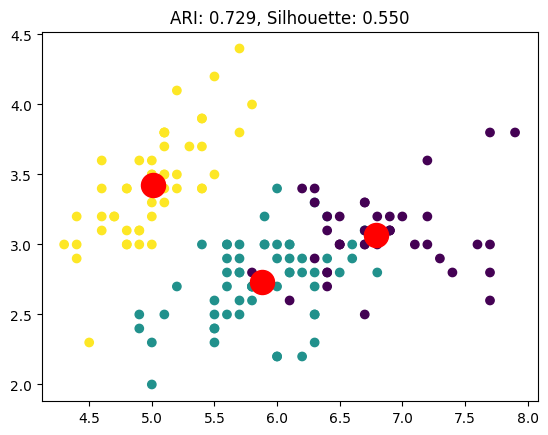

2.2628533840179443 s


In [2]:
import numpy as np
from scipy.spatial.distance import cdist
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.metrics import adjusted_rand_score, silhouette_score
import time

start_time = time.time()

class AntColonyClustering:
    def __init__(self, data, num_clusters, num_ants, num_iterations, alpha=1.0, beta=2.0, evaporation_rate=0.5, pheromone_init=1.0):
        self.data = data
        self.num_clusters = num_clusters
        self.num_ants = num_ants
        self.num_iterations = num_iterations
        self.alpha = alpha
        self.beta = beta
        self.evaporation_rate = evaporation_rate
        self.pheromone_init = pheromone_init
        self.pheromone = np.ones((len(data), num_clusters)) * pheromone_init
        self.best_centroids = None

    def initialize_centroids(self):
        indices = np.random.choice(len(self.data), self.num_clusters, replace=False)
        return self.data[indices]

    def assign_clusters(self, centroids):
        distances = cdist(self.data, centroids, metric='euclidean')
        cluster_assignments = np.argmin(distances, axis=1)
        return cluster_assignments

    def update_pheromone(self, assignments, centroids):
        pheromone_delta = np.zeros_like(self.pheromone)
        for i in range(len(self.data)):
            pheromone_delta[i, assignments[i]] += 1.0 / np.linalg.norm(self.data[i] - centroids[assignments[i]])
        self.pheromone = (1 - self.evaporation_rate) * self.pheromone + pheromone_delta

    def update_centroids(self, assignments):
        centroids = np.zeros((self.num_clusters, self.data.shape[1]))
        for k in range(self.num_clusters):
            cluster_points = self.data[assignments == k]
            if len(cluster_points) > 0:
                centroids[k] = cluster_points.mean(axis=0)
            else:
                centroids[k] = self.data[np.random.choice(len(self.data))]
        return centroids

    def fit(self):
        best_assignments = None
        best_centroids = None
        best_score = np.inf

        for iteration in range(self.num_iterations):
            print(f"Iteration {iteration + 1}")  # Menampilkan iterasi saat ini
            centroids = self.initialize_centroids()
            for ant in range(self.num_ants):
                assignments = self.assign_clusters(centroids)
                score = self.calculate_score(assignments, centroids)
                if score < best_score:
                    best_score = score
                    best_assignments = assignments
                    best_centroids = centroids
                self.update_pheromone(assignments, centroids)
                centroids = self.update_centroids(assignments)

        self.best_centroids = best_centroids
        return best_assignments

    def calculate_score(self, assignments, centroids):
        score = 0.0
        for i in range(len(self.data)):
            score += np.linalg.norm(self.data[i] - centroids[assignments[i]])
        return score

    @staticmethod
    def evaluate_ari(true_labels, predicted_labels):
        ari = adjusted_rand_score(true_labels, predicted_labels)
        return ari

    @staticmethod
    def evaluate_silhouette(data, predicted_labels):
        silhouette_avg = silhouette_score(data, predicted_labels)
        return silhouette_avg

# Contoh penggunaan
if __name__ == "__main__":
    data = load_iris().data
    true_labels = load_iris().target

    aco_clustering = AntColonyClustering(data, num_clusters=3, num_ants=10, num_iterations=50)
    predicted_labels = aco_clustering.fit()
    centroids = aco_clustering.best_centroids

    # Evaluasi hasil clustering
    ari = AntColonyClustering.evaluate_ari(true_labels, predicted_labels)
    silhouette_avg = AntColonyClustering.evaluate_silhouette(data, predicted_labels)

    print(f"Adjusted Rand Index (ARI): {ari}")
    print(f"Silhouette Score: {silhouette_avg}")

    # Visualisasi hasil clustering
    plt.scatter(data[:, 0], data[:, 1], c=predicted_labels, cmap='viridis')
    plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red')
    plt.title(f'ARI: {ari:.3f}, Silhouette: {silhouette_avg:.3f}')
    plt.show()
end_time = time.time()
hasil_waktu = end_time - start_time

print(str(hasil_waktu)+' s')

<h1>PENJELASAN CODE</h1>

<h2>insialisasi variabel</h2>
<p>sebelum, menajalankan algoritma kita perlu meng inisialisasi variabel</p>


In [4]:
def initialize(data, num_clusters, num_ants, num_iterations, alpha=1.0, beta=2.0, evaporation_rate=0.5, pheromone_init=1.0):
    """
    Inisialisasi parameter-parameter untuk algoritma clustering berbasis ant colony.

    Args:
        data (array-like): Dataset yang akan dikluster.
        num_clusters (int): Jumlah kluster yang diinginkan.
        num_ants (int): Jumlah semut yang digunakan dalam algoritma.
        num_iterations (int): Jumlah iterasi maksimal yang akan dijalankan.
        alpha (float, optional): Parameter yang mengontrol pentingnya feromon. Default adalah 1.0.
        beta (float, optional): Parameter yang mengontrol pentingnya informasi heuristik. Default adalah 2.0.
        evaporation_rate (float, optional): Tingkat evaporasi feromon. Default adalah 0.5.
        pheromone_init (float, optional): Nilai awal feromon. Default adalah 1.0.

    Returns:
        tuple: Berisi data yang diinput, jumlah kluster, jumlah semut, jumlah iterasi, nilai alpha, beta, tingkat evaporasi, dan matriks feromon yang diinisialisasi.
    """
    data = data
    num_clusters = num_clusters
    num_ants = num_ants
    num_iterations = num_iterations
    alpha = alpha
    beta = beta
    evaporation_rate = evaporation_rate
    pheromone_init = pheromone_init
    pheromone = np.ones((len(data), num_clusters)) * pheromone_init
    best_centroids = None
    return data, num_clusters, num_ants, num_iterations, alpha, beta, evaporation_rate, pheromone_init

data = load_iris().data
print(initialize(data, 3, 10, 50))

(array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 

<h2>inisialisasi centroid</h2>
<p>Centroid adalah titik pusat atau representatif dari suatu kelompok atau cluster dalam ruang data. Dalam konteks clustering, centroid sering kali merupakan titik rata-rata dari semua titik data dalam sebuah cluster.</p>

<p>Misalnya, jika kita memiliki sebuah dataset dengan dua fitur (misalnya, panjang dan lebar sepal dari bunga iris), kita bisa melakukan clustering untuk mengelompokkan data menjadi beberapa kelompok berdasarkan kedekatan titik-titik data. Setiap kelompok akan memiliki centroid, yang merupakan titik pusat dari kelompok tersebut.</p>

In [9]:
def initialize_centroids(data, num_clusters):
    """
    Inisialisasi centroid untuk algoritma clustering dengan memilih titik acak dari data.

    Args:
        data (array-like): Dataset yang akan dikluster.
        num_clusters (int): Jumlah kluster yang diinginkan.

    Returns:
        array: Array yang berisi centroid yang diinisialisasi.
    """
    # Memilih secara acak 'num_clusters' indeks dari data tanpa pengulangan
    indices = np.random.choice(len(data), num_clusters, replace=False)

    # Mengembalikan elemen data yang dipilih oleh indeks yang dipilih
    return data[indices]

# Memuat dataset Iris
data = load_iris().data

# Inisialisasi centroid
centroids = initialize_centroids(data, 3)

print(centroids)


[[6.5 3.  5.8 2.2]
 [6.2 3.4 5.4 2.3]
 [6.  3.  4.8 1.8]]


<h2>Menyiapkan Cluster</h2>
<p>Langkah ini adalah langkah utama dalam proses clustering. Langkah ini digunakan untuk menetapkan titik data ke cluster tertentu berdasarkan kedekatan jaraknya dengan centroid.</p>

In [10]:
import numpy as np
from scipy.spatial.distance import cdist

def assign_clusters(data, centroids):
    """
    Mengassign data ke kluster terdekat berdasarkan centroid menggunakan jarak Euclidean.

    Args:
        data (array-like): Dataset yang akan dikluster.
        centroids (array-like): Posisi centroid untuk setiap kluster.

    Returns:
        array: Array yang berisi indeks kluster untuk setiap data berdasarkan centroid terdekat.
    """
    # Menghitung jarak Euclidean antara setiap titik data dan setiap centroid
    distances = cdist(data, centroids, metric='euclidean')

    # Menentukan kluster terdekat untuk setiap titik data dengan mencari indeks jarak minimum
    cluster_assignments = np.argmin(distances, axis=1)

    # Mengembalikan array yang berisi indeks kluster untuk setiap titik data
    return cluster_assignments

# Inisialisasi centroid dengan nilai yang diberikan
centroids = np.array([[6.8, 2.8, 4.8, 1.4],
                      [7.1, 3.0, 5.9, 2.1],
                      [4.8, 3.1, 1.6, 0.2]])

# Inisialisasi data dengan nilai yang diberikan
data = np.array([[2.1, 2.6, 3.3, 4.6],
                 [3.2, 1.8, 4.3, 2.1],
                 [3.7, 3.5, 4.5, 2.7]])

# Menentukan kluster untuk setiap titik data berdasarkan centroid terdekat
print(assign_clusters(data, centroids))


[2 0 0]


<p>bisa dilihat dalam code ini, dalam pendeklerasian cluster terlihat bahwa ant colony akan mengalami masalah dalam membedakan bunga IRIS. Hal ini dapat di analisa pada hasil output array yang menunjukkan nilai [2 0 0].</p>


<h2>Kalkulasi score</h2>
<p>langkah ini digunakan  menghitung skor total dari suatu penugasan cluster terhadap centroid tertentu, yang dapat digunakan untuk mengevaluasi kualitas dari clustering yang dihasilkan. Semakin kecil nilai skor, semakin baik penugasan clusternya, karena itu menunjukkan bahwa titik-titik data dalam cluster cenderung berada dekat dengan centroidnya.</p>


In [11]:
import numpy as np

def calculate_score(data, assignments, centroids):
    """
    Menghitung skor total (inertia) dari kluster dengan menjumlahkan jarak Euclidean
    antara setiap titik data dan centroid kluster yang diassign.

    Args:
        data (array-like): Dataset yang berisi titik-titik data.
        assignments (list or array): Indeks kluster yang diassign untuk setiap titik data.
        centroids (array-like): Posisi centroid untuk setiap kluster.

    Returns:
        float: Skor total (inertia) dari kluster.
    """
    score = 0.0  # Inisialisasi skor total dengan 0
    for i in range(len(data)):  # Iterasi melalui setiap titik data
        # Menambahkan jarak Euclidean antara titik data ke-i dan centroid yang diassign ke skor total
        score += np.linalg.norm(data[i] - centroids[assignments[i]])
    return score  # Mengembalikan skor total

# Inisialisasi data dengan nilai yang diberikan
data = np.array([[2.1, 2.6, 3.3, 4.6],
                 [3.2, 1.8, 4.3, 2.1],
                 [3.7, 3.5, 4.5, 2.7]])

# Inisialisasi centroid dengan nilai yang diberikan
centroids = np.array([[6.8, 2.8, 4.8, 1.4],
                      [7.1, 3.0, 5.9, 2.1],
                      [4.8, 3.1, 1.6, 0.2]])

# Menghitung dan mencetak skor total berdasarkan kluster yang diassign
print(calculate_score(data, [2, 0, 0], centroids))


12.738817110057054


<p>nilai output calculate_score  menunjukkan total jarak antara setiap titik data dalam dataset dengan centroid cluster yang ditugaskan kepadanya. Semakin kecil nilai skor, semakin baik kualitas clusteringnya, karena menunjukkan bahwa titik-titik data cenderung berada dekat dengan centroidnya.</p>

<h2>Feromon dan Update feromon</h2>
<p>Dalam konteks algoritma koloni semut (ant colony optimization), feromon merupakan konsep yang diadopsi dari perilaku semut yang sebenarnya. Ketika semut menemukan jalur menuju sumber makanan, mereka meninggalkan jejak feromon yang berfungsi sebagai petunjuk bagi semut lain untuk mengikuti jalur yang sama. Seiring waktu, semut yang mengikuti jalur tersebut akan meninggalkan jejak feromon tambahan, yang membuat jalur tersebut semakin menonjol.</p>



In [12]:
import numpy as np

def update_pheromone(data, assignments, centroids, pheromone, evaporation_rate):
    """
    Memperbarui matriks feromon berdasarkan jarak antara titik data dan centroid yang diassign,
    serta menerapkan tingkat evaporasi feromon.

    Args:
        data (array-like): Dataset yang berisi titik-titik data.
        assignments (list or array): Indeks kluster yang diassign untuk setiap titik data.
        centroids (array-like): Posisi centroid untuk setiap kluster.
        pheromone (array-like): Matriks feromon saat ini.
        evaporation_rate (float): Tingkat evaporasi feromon.

    Returns:
        array: Matriks feromon yang diperbarui.
    """
    # Inisialisasi matriks perubahan feromon dengan nol
    pheromone_delta = np.zeros_like(pheromone)

    # Iterasi melalui setiap titik data
    for i in range(len(data)):
        # Menambahkan kontribusi feromon ke kluster yang diassign berdasarkan jarak
        pheromone_delta[i, assignments[i]] += 1.0 / np.linalg.norm(data[i] - centroids[assignments[i]])

    # Memperbarui matriks feromon dengan mengaplikasikan tingkat evaporasi dan menambahkan perubahan feromon
    pheromone = (1 - evaporation_rate) * pheromone + pheromone_delta

    # Mengembalikan matriks feromon yang diperbarui
    return pheromone

# Inisialisasi data dengan nilai yang diberikan
data = np.array([[2.1, 2.6, 3.3, 4.6],
                 [3.2, 1.8, 4.3, 2.1],
                 [3.7, 3.5, 4.5, 2.7]])

# Inisialisasi centroid dengan nilai yang diberikan
centroids = np.array([[6.8, 2.8, 4.8, 1.4],
                      [7.1, 3.0, 5.9, 2.1],
                      [4.8, 3.1, 1.6, 0.2]])

# Inisialisasi matriks feromon dengan nilai awal 1
pheromone = np.ones((len(data), 3)) * 1

# Menghitung dan mencetak matriks feromon yang diperbarui
print(update_pheromone(data, [2, 0, 0], centroids, pheromone, 0.5))


[[0.5        0.5        0.68321657]
 [0.76082027 0.5        0.5       ]
 [0.79012943 0.5        0.5       ]]


<p>output diatas adalah jalur yang lebih optimal dalam ruang pencarian. Semut-senut "meletakkan" feromon di jalur-jalur yang mereka eksplorasi, dan intensitas feromon di suatu jalur dipengaruhi oleh kualitas solusi yang ditemukan. Dengan demikian, semakin baik kualitas solusi, semakin tinggi intensitas feromonnya.</p>

<h2>update centroid</h2>
<p>fungsi ini digunkaan untuk mengupdate centroid agar algoritma bisa mengcluster data lebih optimal</p>

In [13]:
import numpy as np

def update_centroids(data, assignments, num_clusters):
    """
    Memperbarui posisi centroid berdasarkan rata-rata titik data yang diassign ke masing-masing kluster.

    Args:
        data (array-like): Dataset yang berisi titik-titik data.
        assignments (list or array): Indeks kluster yang diassign untuk setiap titik data.
        num_clusters (int): Jumlah kluster.

    Returns:
        array: Posisi centroid yang diperbarui.
    """
    # Inisialisasi array centroid dengan ukuran (num_clusters, jumlah fitur data) dan nilai awal 0
    centroids = np.zeros((num_clusters, data.shape[1]))

    # Iterasi melalui setiap kluster
    for k in range(num_clusters):
        # Mengambil semua titik data yang diassign ke kluster k
        cluster_points = data[assignments == k]

        if len(cluster_points) > 0:  # Jika ada titik data yang diassign ke kluster ini
            # Menghitung rata-rata dari titik-titik data di kluster ini dan mengassignnya sebagai centroid baru
            centroids[k] = cluster_points.mean(axis=0)
        else:  # Jika tidak ada titik data yang diassign ke kluster ini
            # Mengassign centroid dengan titik data acak dari dataset untuk menghindari centroid kosong
            centroids[k] = data[np.random.choice(len(data))]

    # Mengembalikan posisi centroid yang diperbarui
    return centroids

# Inisialisasi data dengan nilai yang diberikan
data = np.array([[2.1, 2.6, 3.3, 4.6],
                 [3.2, 1.8, 4.3, 2.1],
                 [3.7, 3.5, 4.5, 2.7]])

# Inisialisasi centroid dengan nilai yang diberikan
centroids = np.array([[6.8, 2.8, 4.8, 1.4],
                      [7.1, 3.0, 5.9, 2.1],
                      [4.8, 3.1, 1.6, 0.2]])

# Menghitung dan mencetak posisi centroid yang diperbarui berdasarkan data dan assignments yang diberikan
print(update_centroids(data, [2, 0, 0], 3))


[[3.2 1.8 4.3 2.1]
 [3.2 1.8 4.3 2.1]
 [2.1 2.6 3.3 4.6]]


<p>output diatas adalah centroid yang baru yang akan digunakan di algoritma</p>

<h2>EVALUASI</h2>
saat di evaluasi, ARI memberi nilai 0.729 dan silhouette memberi nilai 0.29. ARi dan silhouette adalah metrics yang sering digunakan dalam clusterin untuk membandingkan data. Dalam case kita, nilai tersebur termasuk nilai yang baik meskipun belum mencapi nilai maksimal.</p>


In [15]:
# Mendefinisikan fungsi untuk mengevaluasi clustering menggunakan metrik ARI (Adjusted Rand Index)
def evaluate_ari(true_labels, predicted_labels):
    # Menghitung ARI antara label yang sebenarnya dan label yang diprediksi
    ari = adjusted_rand_score(true_labels, predicted_labels)
    return ari

# Mendefinisikan fungsi untuk mengevaluasi clustering menggunakan metrik Silhouette Score
def evaluate_silhouette(data, predicted_labels):
    # Menghitung Silhouette Score dari clustering yang diprediksi
    silhouette_avg = silhouette_score(data, predicted_labels)
    return silhouette_avg

# Memuat dataset Iris
data = load_iris().data
# Memuat label yang sebenarnya dari dataset Iris
true_labels = load_iris().target

# Mendapatkan label yang diprediksi dari hasil clustering dengan algoritme ACO
predicted_labels = aco_clustering.fit()

# Mencetak nilai ARI dari clustering yang diprediksi dibandingkan dengan clustering yang sebenarnya
print(evaluate_ari(true_labels, predicted_labels))
# Mencetak nilai Silhouette Score dari clustering yang diprediksi
print(evaluate_silhouette(data, predicted_labels))


Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8


<ipython-input-2-1e9bb7412df6>:35: RuntimeWarning: divide by zero encountered in scalar divide
  pheromone_delta[i, assignments[i]] += 1.0 / np.linalg.norm(self.data[i] - centroids[assignments[i]])


Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Iteration 21
Iteration 22
Iteration 23
Iteration 24
Iteration 25
Iteration 26
Iteration 27
Iteration 28
Iteration 29
Iteration 30
Iteration 31
Iteration 32
Iteration 33
Iteration 34
Iteration 35
Iteration 36
Iteration 37
Iteration 38
Iteration 39
Iteration 40
Iteration 41
Iteration 42
Iteration 43
Iteration 44
Iteration 45
Iteration 46
Iteration 47
Iteration 48
Iteration 49
Iteration 50
0.7294203486015404
0.549517512647162


<h2>VISUALISASI</h2>
<p>Didalam plot tersebut bisa dilihat bahwa terdapat dua data yang digunakan untuk training ada yang memiliki kemiripan yang sama sehingga algoritma ant colony sulit untuk membedakan</p>

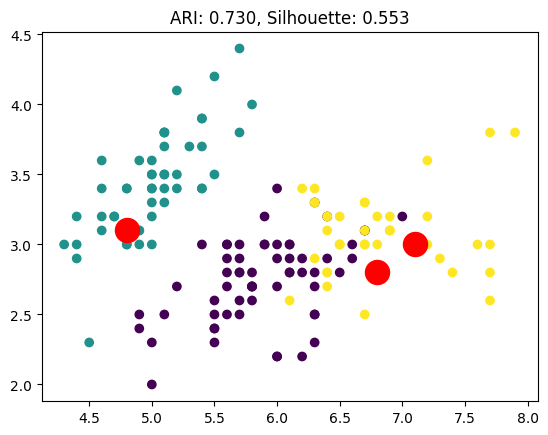

In [ ]:
plt.scatter(data[:, 0], data[:, 1], c=predicted_labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red')
plt.title(f'ARI: {ari:.3f}, Silhouette: {silhouette_avg:.3f}')
plt.show()

<h1>KESIMPULAN</h1>
<p>Ant colony adalah algoritma optimasi yang memiliki kemampuan untuk melakukan clustering. Dalam studi kasus pengelompokan dataset IRIS, terlihat bahwa performa algoritma ant colony cenderung kurang optimal. Hal ini disebabkan oleh karakteristik dataset IRIS yang memiliki nilai-nilai input yang relatif serupa satu sama lain. Meskipun demikian, algoritma ini tetap mampu menyelesaikan permasalahan clustering, namun terdapat tantangan dalam menghasilkan pengelompokan yang sangat baik.</p>

In [ ]:
from sklearn.cluster import KMeans

class KMeansAntColony(AntColonyClustering):
    def __init__(self, data, num_clusters, num_ants, num_iterations, alpha=1.0, beta=2.0, evaporation_rate=0.5, pheromone_init=1.0):
        super().__init__(data, num_clusters, num_ants, num_iterations, alpha, beta, evaporation_rate, pheromone_init)

    def initialize_centroids(self):
        kmeans = KMeans(n_clusters=self.num_clusters)
        kmeans.fit(self.data)
        return kmeans.cluster_centers_


Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

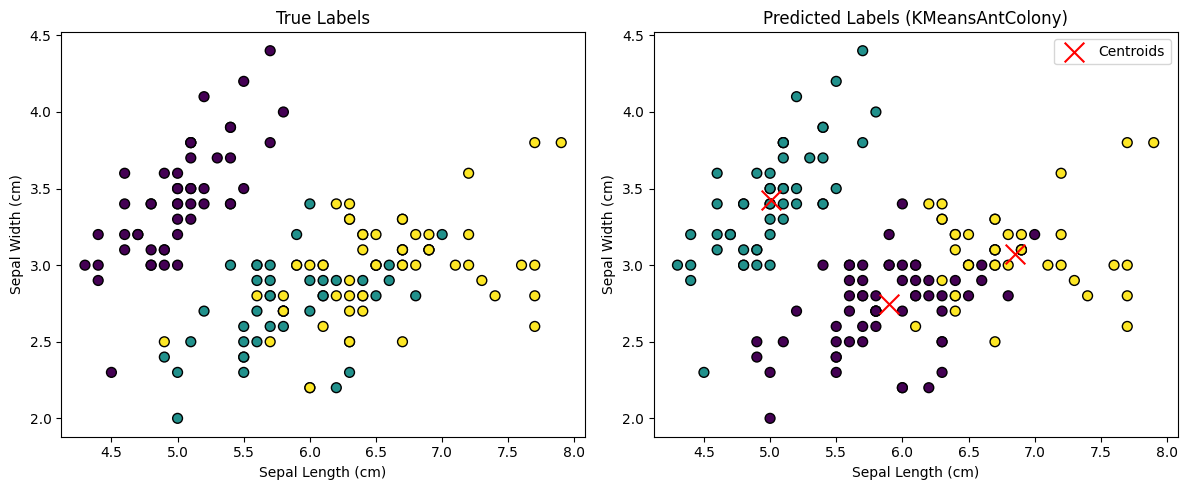

Adjusted Rand Index (ARI): 0.7302382722834697
Silhouette Score: 0.5528190123564095


In [ ]:
# Load data Iris
iris = load_iris()
data = iris.data
true_labels = iris.target

# Inisialisasi parameter
num_clusters = 3
num_ants = 10
num_iterations = 20

# Melakukan clustering menggunakan KMeansAntColony
kmeans_ant_colony = KMeansAntColony(data, num_clusters, num_ants, num_iterations)
predicted_labels = kmeans_ant_colony.fit()

# Plot hasil clustering
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(data[:, 0], data[:, 1], c=true_labels, cmap='viridis', edgecolor='k', s=50)
plt.title('True Labels')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')

plt.subplot(1, 2, 2)
plt.scatter(data[:, 0], data[:, 1], c=predicted_labels, cmap='viridis', edgecolor='k', s=50)
plt.scatter(kmeans_ant_colony.best_centroids[:, 0], kmeans_ant_colony.best_centroids[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.title('Predicted Labels (KMeansAntColony)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluasi clustering
ari = kmeans_ant_colony.evaluate_ari(true_labels, predicted_labels)
silhouette_avg = kmeans_ant_colony.evaluate_silhouette(data, predicted_labels)

print("Adjusted Rand Index (ARI):", ari)
print("Silhouette Score:", silhouette_avg)


Adjusted Rand Index: 0.3297668868652037


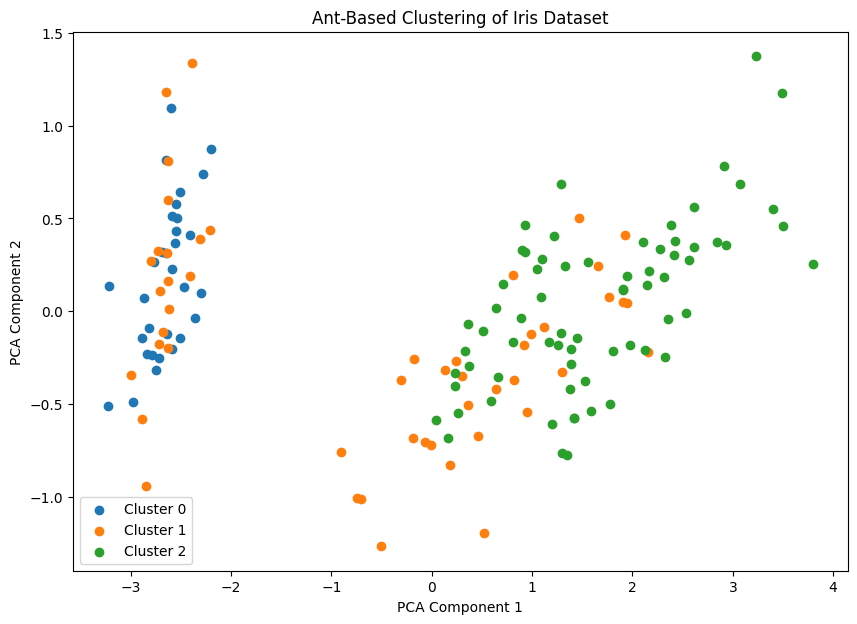

In [ ]:
import numpy as np
from sklearn import datasets
from scipy.spatial.distance import euclidean
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Define the ant-based clustering class
class AntClustering:
    def __init__(self, data, k, N, M, kp, alpha, kc, alpha1):
        self.data = data
        self.k = k
        self.N = N
        self.M = M
        self.kp = kp
        self.alpha = alpha
        self.kc = kc
        self.alpha1 = alpha1
        self.data_reactors = [[] for _ in range(k)]
        self.initialize_reactors()

    def initialize_reactors(self):
        indices = np.random.choice(range(len(self.data)), len(self.data), replace=False)
        for i, idx in enumerate(indices):
            self.data_reactors[i % self.k].append(self.data[idx])

    def average_similarity(self, reactor):
        if len(reactor) <= 1:
            return [0] * len(reactor)
        similarities = []
        for i in range(len(reactor)):
            sum_sim = 0
            for j in range(len(reactor)):
                if i != j:
                    sum_sim += 1 - np.sqrt(euclidean(reactor[i], reactor[j]) / self.alpha)
            similarities.append(sum_sim / (len(reactor) - 1))
        return similarities

    def pick_up_probability(self, f_oi):
        return (self.kp / (self.kp + f_oi)) ** 2

    def combination_probability(self, similarity):
        if similarity < self.kc:
            return 2 * similarity
        else:
            return 1

    def run(self):
        for iteration in range(self.M):
            ants = [0] * self.N
            for step in range(self.M):
                for ant in range(self.N):
                    current_reactor = ants[ant]
                    if len(self.data_reactors[current_reactor]) == 1:
                        obj = self.data_reactors[current_reactor].pop()
                        ants[ant] = self.find_new_reactor(obj)
                        self.data_reactors[ants[ant]].append(obj)
                    else:
                        f_oi = self.average_similarity(self.data_reactors[current_reactor])
                        obj_idx = np.argmin(f_oi)
                        p_pick = self.pick_up_probability(f_oi[obj_idx])
                        if np.random.rand() < p_pick:
                            obj = self.data_reactors[current_reactor].pop(obj_idx)
                            ants[ant] = self.find_new_reactor(obj)
                            self.data_reactors[ants[ant]].append(obj)

            # Combine similar reactors
            self.combine_reactors()

            # Check for termination condition (this is a simple implementation; you may want a more sophisticated check)
            if iteration > 0 and self.convergence_check():
                break

    def find_new_reactor(self, obj):
        similarities = []
        for reactor in self.data_reactors:
            if reactor:
                center = np.mean(reactor, axis=0)
                similarity = 1 - euclidean(center, obj) / self.alpha1
                similarities.append(similarity)
            else:
                similarities.append(-np.inf)
        return np.argmax(similarities)

    def combine_reactors(self):
        for i in range(len(self.data_reactors)):
            for j in range(i + 1, len(self.data_reactors)):
                if self.data_reactors[i] and self.data_reactors[j]:
                    center_i = np.mean(self.data_reactors[i], axis=0)
                    center_j = np.mean(self.data_reactors[j], axis=0)
                    similarity = 1 - euclidean(center_i, center_j) / self.alpha1
                    p_combine = self.combination_probability(similarity)
                    if np.random.rand() < p_combine:
                        self.data_reactors[i].extend(self.data_reactors[j])
                        self.data_reactors[j] = []

    def convergence_check(self):
        # Implement a check to see if the difference between clustering results of consecutive iterations is less than a threshold
        # This is a placeholder implementation
        return True

# Load the Iris dataset
iris = datasets.load_iris()
data = iris.data
true_labels = iris.target

# Parameters for the ant clustering algorithm
k = 3
N = 20
M = 15000
kp = 0.1
alpha = 1.5
kc = 0.15
alpha1 = 0.4

clustering = AntClustering(data, k, N, M, kp, alpha, kc, alpha1)
clustering.run()

# Assign cluster labels
cluster_labels = np.zeros(len(data))
for idx, reactor in enumerate(clustering.data_reactors):
    for obj in reactor:
        cluster_labels[np.all(data == obj, axis=1)] = idx

# Evaluate clustering performance
ari = adjusted_rand_score(true_labels, cluster_labels)

print(f"Adjusted Rand Index: {ari}")

# Plotting the clustering result
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data)

plt.figure(figsize=(10, 7))
for idx, reactor in enumerate(clustering.data_reactors):
    if reactor:
        reactor_data = np.array(reactor)
        reduced_reactor_data = pca.transform(reactor_data)
        plt.scatter(reduced_reactor_data[:, 0], reduced_reactor_data[:, 1], label=f'Cluster {idx}')

plt.title('Ant-Based Clustering of Iris Dataset')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()
